# Pandas training 

### The examples are either from or inspired by the book "Pandas in Action". The book is written by Boris Paskhaver and is available by Manning Publications.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/Volumes/GoogleDrive/My Drive/Dropbox/Courses/Pandas_in_action_Manning/pandas-in-action-master/chapter_01_introducing_pandas/movies.csv")

In [3]:
# Get the first five rows of the data
data.head(5)

,Rank,Title,Studio,Gross,Year
0,1,Avengers: Endgame,Buena Vista,"$2,796.30",2019
1,2,Avatar,Fox,"$2,789.70",2009
2,3,Titanic,Paramount,"$2,187.50",1997
3,4,Star Wars: The Force Awakens,Buena Vista,"$2,068.20",2015
4,5,Avengers: Infinity War,Buena Vista,"$2,048.40",2018


In [4]:
# Get the last five rows of the data
data.tail(5)

,Rank,Title,Studio,Gross,Year
777,778,Yogi Bear,Warner Brothers,$201.60,2010
778,779,Garfield: The Movie,Fox,$200.80,2004
779,780,Cats & Dogs,Warner Brothers,$200.70,2001
780,781,The Hunt for Red October,Paramount,$200.50,1990
781,782,Valkyrie,MGM,$200.30,2008


In [5]:
# Get number of rows and columns
nrow, ncol = data.shape
print(nrow)
print(ncol)

782
5


In [6]:
# Another way to find the number of rows is the following
len(data)

782

In [7]:
# Get total number of entries
data.size

3910

In [39]:
# Find the data types for the columns
data.dtypes

Rank       int64
Title     object
Studio    object
Gross     object
Year       int64
dtype: object

In [40]:
# Get a row with a certain number meaning the numeric position of the row
data.iloc[778] # This does not return 778 but 779 because unlike Julia or R, Python is zero-based

Rank                      779
Title     Garfield: The Movie
Studio                    Fox
Gross                $200.80 
Year                     2004
Name: 778, dtype: object

In [41]:
# Get a certain row based on the index - for this we need to specify the index column 
data = pd.read_csv("/Volumes/GoogleDrive/My Drive/Dropbox/Courses/Pandas_in_action_Manning/pandas-in-action-master/chapter_01_introducing_pandas/movies.csv", index_col="Title")
data.loc['Garfield: The Movie']

Rank           779
Studio         Fox
Gross     $200.80 
Year          2004
Name: Garfield: The Movie, dtype: object

In [42]:
# Get a certain column
data.head()

,Rank,Studio,Gross,Year
Title,,,,
Avengers: Endgame,1,Buena Vista,"$2,796.30",2019
Avatar,2,Fox,"$2,789.70",2009
Titanic,3,Paramount,"$2,187.50",1997
Star Wars: The Force Awakens,4,Buena Vista,"$2,068.20",2015
Avengers: Infinity War,5,Buena Vista,"$2,048.40",2018


In [43]:
# Subset the dataframe, get the movies where the studio was Universal
universal_studio_movies = data[data["Studio"] == "Universal"]

In [44]:
universal_studio_movies.head()

,Rank,Studio,Gross,Year
Title,,,,
Jurassic World,6,Universal,"$1,671.70",2015
Furious 7,8,Universal,"$1,516.00",2015
Jurassic World: Fallen Kingdom,13,Universal,"$1,309.50",2018
The Fate of the Furious,17,Universal,"$1,236.00",2017
Minions,19,Universal,"$1,159.40",2015


In [45]:
universal_studio_movies.sort_values(by = 'Gross', ascending = True)

,Rank,Studio,Gross,Year
Title,,,,
Jurassic Park,33,Universal,"$1,029.50",1993
Despicable Me 3,32,Universal,"$1,034.80",2017
Minions,19,Universal,"$1,159.40",2015
The Fate of the Furious,17,Universal,"$1,236.00",2017
Jurassic World: Fallen Kingdom,13,Universal,"$1,309.50",2018
...,...,...,...,...
Sing,134,Universal,$634.20,2016
Fast & Furious 6,86,Universal,$788.70,2013
E.T.: The Extra-Terrestrial,84,Universal,$792.90,1982


In [46]:
# What if we want to sort by more than one columns?
universal_studio_movies.sort_values(by = ['Gross', 'Title'])

,Rank,Studio,Gross,Year
Title,,,,
Jurassic Park,33,Universal,"$1,029.50",1993
Despicable Me 3,32,Universal,"$1,034.80",2017
Minions,19,Universal,"$1,159.40",2015
The Fate of the Furious,17,Universal,"$1,236.00",2017
Jurassic World: Fallen Kingdom,13,Universal,"$1,309.50",2018
...,...,...,...,...
Sing,134,Universal,$634.20,2016
Fast & Furious 6,86,Universal,$788.70,2013
E.T.: The Extra-Terrestrial,84,Universal,$792.90,1982


In [47]:
# Now what if we want to subset the dataframe based on multiple conditions?
# (e.g., movies by Universal released after 1994)

universal_studio = data['Studio'] == 'Universal'
released_after_1994 = data['Year'] > 1994
data[universal_studio & released_after_1994].head()

,Rank,Studio,Gross,Year
Title,,,,
Jurassic World,6,Universal,"$1,671.70",2015
Furious 7,8,Universal,"$1,516.00",2015
Jurassic World: Fallen Kingdom,13,Universal,"$1,309.50",2018
The Fate of the Furious,17,Universal,"$1,236.00",2017
Minions,19,Universal,"$1,159.40",2015


In [48]:
# If we wanted instead to find movies either from Universal or released after 1994
movies_either_from_universal_or_after_1994 = data[universal_studio | released_after_1994]

In [49]:
movies_either_from_universal_or_after_1994.head()

,Rank,Studio,Gross,Year
Title,,,,
Avengers: Endgame,1,Buena Vista,"$2,796.30",2019
Avatar,2,Fox,"$2,789.70",2009
Titanic,3,Paramount,"$2,187.50",1997
Star Wars: The Force Awakens,4,Buena Vista,"$2,068.20",2015
Avengers: Infinity War,5,Buena Vista,"$2,048.40",2018


In [50]:
# We can sort by index which happens to be the title in this case
data.sort_index().head()

,Rank,Studio,Gross,Year
Title,,,,
"10,000 B.C.",536,Warner Brothers,$269.80,2008
101 Dalmatians,708,Buena Vista,$215.90,1961
101 Dalmatians,425,Buena Vista,$320.70,1996
2 Fast 2 Furious,632,Universal,$236.40,2003
2012,93,Sony,$769.70,2009


In [51]:
data.sort_index().tail()

,Rank,Studio,Gross,Year
Title,,,,
Yogi Bear,778,Warner Brothers,$201.60,2010
You've Got Mail,582,Warner Brothers,$250.80,1998
Your Name.,356,FUN,$358.00,2017
Zootopia,37,Buena Vista,"$1,023.80",2016
xXx: The Return of Xander Cage,385,Paramount,$346.10,2017


In [52]:
# Select values in a range (e.g. 1980-1989 for year)
eighties = data['Year'].between(1980, 1989)
data[eighties].head()
data[eighties]['Year'].unique()

array([1982, 1980, 1983, 1989, 1981, 1985, 1986, 1988, 1984, 1987])

## Series

In [53]:
# Import libraries
import pandas as pd
import numpy as np

In [54]:
# Create a Series with values from an array
ice_cream_flavor = ["Chocolate", "Banana", "Vanilla"]

In [55]:
type(ice_cream_flavor)

list

In [56]:
# Create a series with ice cream flavors
ice_cream_series = pd.Series(ice_cream_flavor)

In [57]:
type(ice_cream_series)

pandas.core.series.Series

In [58]:
ice_cream_series

0    Chocolate
1       Banana
2      Vanilla
dtype: object

In [59]:
# Subset series
ice_cream_series[0]

'Chocolate'

In [60]:
# Reverse the order of elements - same as in the case of an array
ice_cream_series[::-1]

2      Vanilla
1       Banana
0    Chocolate
dtype: object

In [61]:
numbers = pd.Series([1, 2, 3, 4, 5], dtype = "float")
numbers

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

In [62]:
# Non-available (missing) values in a Series
numbers = pd.Series([1, 2, 3, np.nan, 5])

In [63]:
numbers

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

In [64]:
# Create a series from a dictionary
calorie_info = {
             "Cereal": 125,
             "Chocolate Bar": 406,
             "Ice Cream Sundae": 342,
         }

In [65]:
calories = pd.Series(calorie_info)

In [66]:
calories

Cereal              125
Chocolate Bar       406
Ice Cream Sundae    342
dtype: int64

In [67]:
calories.values

array([125, 406, 342])

In [68]:
calories.index

Index(['Cereal', 'Chocolate Bar', 'Ice Cream Sundae'], dtype='object')

In [69]:
print(calories.size)
print(calories.shape)

3
(3,)


In [70]:
numbers_to_100 = pd.Series([i for i in range(1,101,1)])

In [71]:
numbers_to_100

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Length: 100, dtype: int64

In [72]:
np.sum(numbers_to_100)

5050

In [73]:
# Some simple series methods
print(numbers_to_100.head())
print(numbers_to_100.tail())

0    1
1    2
2    3
3    4
4    5
dtype: int64
95     96
96     97
97     98
98     99
99    100
dtype: int64


In [74]:
# Statistical operations on series
numbers_to_100.count()

100

In [75]:
numbers_to_100.sum()

5050

In [76]:
numbers_to_100.sum(skipna=False)

5050

In [77]:
# Calculate the product of numbers from 1 to 100
numbers_to_10 = pd.Series([i for i in range(1,11,1)])
print(numbers_to_10)
print(numbers_to_10.product())

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64
3628800


In [78]:
numbers_to_100

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Length: 100, dtype: int64

In [79]:
# Calculate the mean
numbers_to_10.mean()

5.5

In [80]:
# Calculate the median
numbers_to_10.median()

5.5

In [81]:
# Find the minimum value
numbers_to_10.min()

1

In [82]:
# Find the maximum value
numbers_to_10.max()

10

In [83]:
# To collectively describe the series
numbers_to_10.describe()

count    10.00000
mean      5.50000
std       3.02765
min       1.00000
25%       3.25000
50%       5.50000
75%       7.75000
max      10.00000
dtype: float64

In [84]:
# Find the unique values in the Series
numbers_to_10.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [85]:
# Find the number of unique values in the series
numbers_to_10.nunique()

10

In [86]:
# Return the number of rows
len(numbers_to_10)

10

In [87]:
# Convert the Series object into a list
list(numbers_to_10)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [88]:
# Convert the Series into a dictionary
dict(numbers_to_10)

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10}

In [89]:
numbers_to_10.is_unique

True

In [90]:
# Mathematical operations on sets

# Add a value to each element
print(numbers_to_10 + 1)

# Subtract a value from each element
print(numbers_to_10 - 1)

# Divide with a number
print(numbers_to_10 / 2)

# Get the remainder
print(numbers_to_10 % 2)

0     2
1     3
2     4
3     5
4     6
5     7
6     8
7     9
8    10
9    11
dtype: int64
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64
0    0.5
1    1.0
2    1.5
3    2.0
4    2.5
5    3.0
6    3.5
7    4.0
8    4.5
9    5.0
dtype: float64
0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    0
dtype: int64


In [91]:
# Specify the position of non-available or missing values
values = pd.Series([1, 2, 3, np.nan, 5])
na_values_first = values.sort_values(na_position = "first")
na_values_last = values.sort_values(na_position = "last")
na_values_last

0    1.0
1    2.0
2    3.0
4    5.0
3    NaN
dtype: float64

In [92]:
# Drop NA values
values.dropna()

0    1.0
1    2.0
2    3.0
4    5.0
dtype: float64

In [93]:
# Sort a series based on index
values.sort_index()

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

In [94]:
# Get the largest and smallest values in a series
values.nlargest(2)
values.nsmallest(2)

0    1.0
1    2.0
dtype: float64

In [95]:
# Using inplace
values.sort_values(inplace = True) # This changes to values to sorted values in-place

In [96]:
values

0    1.0
1    2.0
2    3.0
4    5.0
3    NaN
dtype: float64

In [97]:
# Counting the number of occurrences of each element in a series
values.value_counts()

1.0    1
2.0    1
3.0    1
5.0    1
dtype: int64

In [98]:
# Get the percentages ()
values.value_counts(normalize = True) * 100

1.0    25.0
2.0    25.0
3.0    25.0
5.0    25.0
dtype: float64

In [99]:
# How to specify bins and count values in each one of the bins
bins = [i for i in range(0, 110, 10)]
# Generate random integers from 1 to 100
random_num_up_to_100 = np.random.randint(range(1,100))
# Find how many numbers fall in each one of the bins
rand_numbers = pd.Series(random_num_up_to_100)
rand_numbers.value_counts(bins = bins)

(-0.001, 10.0]    29
(10.0, 20.0]      23
(20.0, 30.0]      12
(30.0, 40.0]      10
(40.0, 50.0]       9
(50.0, 60.0]       9
(60.0, 70.0]       6
(70.0, 80.0]       1
(80.0, 90.0]       0
(90.0, 100.0]      0
dtype: int64

In [100]:
# How to use apply, to apply a function e.g. round to each element
rand_float_numbers = np.random.rand(10)
rand_float_numbers = pd.Series(rand_float_numbers)
print(rand_float_numbers)
rand_float_numbers.apply(round)

0    0.508561
1    0.888789
2    0.376055
3    0.840734
4    0.155853
5    0.508940
6    0.103321
7    0.016956
8    0.166947
9    0.416758
dtype: float64


0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    0
8    0
9    0
dtype: int64

In [101]:
# Dataframe constructor
df = pd.DataFrame()

In [102]:
# Create a dictionary to populate the dataframe
city_population = {
    "City": ["New York City", "Paris", "Barcelona", "Rome"],
    "Country": ["United States", "France", "Spain", "Italy"],
    "Population": [8600000, 2141000, 5515000, 2873000]
}

In [103]:
# Create a dataframe from the dictionary
city_pop_df = pd.DataFrame(city_population)

In [104]:
city_pop_df

,City,Country,Population
0,New York City,United States,8600000
1,Paris,France,2141000
2,Barcelona,Spain,5515000
3,Rome,Italy,2873000


In [105]:
# Transpose a dataframe
city_pop_df.transpose
city_pop_df.T

,0,1,2,3
City,New York City,Paris,Barcelona,Rome
Country,United States,France,Spain,Italy
Population,8600000,2141000,5515000,2873000


In [106]:
# Get the first rows of a dataframe
print(city_pop_df.head(2))

            City        Country  Population
0  New York City  United States     8600000
1          Paris         France     2141000


In [107]:
# Get the last rows of a dataframe
print(city_pop_df.tail(2))

        City Country  Population
2  Barcelona   Spain     5515000
3       Rome   Italy     2873000


In [89]:
city_pop_df.columns

Index(['City', 'Country', 'Population'], dtype='object')

In [90]:
# Return the number of dimensions in a dataframe
city_pop_df.ndim

2

In [91]:
# Return the number of rows and columns in a dataframe (in a tuple)
nrow, ncol = city_pop_df.shape
print(nrow)
print(ncol)

4
3


In [92]:
city_pop_df.sum(numeric_only = True)

Population    19129000
dtype: int64

In [93]:
city_pop_df.min(numeric_only = True)

Population    2141000
dtype: int64

In [94]:
city_pop_df.max(numeric_only = True)

Population    8600000
dtype: int64

In [95]:
city_pop_df

,City,Country,Population
0,New York City,United States,8600000
1,Paris,France,2141000
2,Barcelona,Spain,5515000
3,Rome,Italy,2873000


In [96]:
city_pop_df.sort_values(by = "Population", ascending = False)

,City,Country,Population
0,New York City,United States,8600000
2,Barcelona,Spain,5515000
3,Rome,Italy,2873000
1,Paris,France,2141000


In [97]:
array = np.random.randint(1, 101, [10, 10])

In [98]:
df = pd.DataFrame(array)

In [99]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,29,86,27,17,18,4,21,65,61,50
1,90,93,96,2,73,60,13,19,45,21
2,19,37,20,42,90,85,74,53,46,100
3,12,75,60,7,24,82,8,66,50,60
4,18,54,72,94,77,99,4,60,52,12


In [100]:
# Get the row labels
row_labels = ['a','b','c','d','e','f','g','h','i','j']

In [101]:
# Get the column labels
col_labels = ['k','l','m','n','o','p','q','r','s','t']

In [102]:
# Add the row and column labels to the dataframe
data2 = pd.DataFrame(data = array,
            index = row_labels,
            columns = col_labels)

In [103]:
# Sort based on row names
data2.sort_index()
# Sort based on column names
data2.sort_index(axis=1)

,k,l,m,n,o,p,q,r,s,t
a,29,86,27,17,18,4,21,65,61,50
b,90,93,96,2,73,60,13,19,45,21
c,19,37,20,42,90,85,74,53,46,100
d,12,75,60,7,24,82,8,66,50,60
e,18,54,72,94,77,99,4,60,52,12
f,94,21,86,83,5,16,86,99,21,63
g,31,57,60,14,76,99,25,5,29,43
h,28,1,17,95,28,73,93,80,13,29
i,33,22,11,23,81,52,51,51,28,91
j,61,50,99,83,95,19,45,27,6,13


In [104]:
# Reverse the order of rows
data2.sort_index(ascending = False)

,k,l,m,n,o,p,q,r,s,t
j,61,50,99,83,95,19,45,27,6,13
i,33,22,11,23,81,52,51,51,28,91
h,28,1,17,95,28,73,93,80,13,29
g,31,57,60,14,76,99,25,5,29,43
f,94,21,86,83,5,16,86,99,21,63
e,18,54,72,94,77,99,4,60,52,12
d,12,75,60,7,24,82,8,66,50,60
c,19,37,20,42,90,85,74,53,46,100
b,90,93,96,2,73,60,13,19,45,21
a,29,86,27,17,18,4,21,65,61,50


In [105]:
# Reverse the order of columns
data2.sort_index(axis=1, ascending=False)

,t,s,r,q,p,o,n,m,l,k
a,50,61,65,21,4,18,17,27,86,29
b,21,45,19,13,60,73,2,96,93,90
c,100,46,53,74,85,90,42,20,37,19
d,60,50,66,8,82,24,7,60,75,12
e,12,52,60,4,99,77,94,72,54,18
f,63,21,99,86,16,5,83,86,21,94
g,43,29,5,25,99,76,14,60,57,31
h,29,13,80,93,73,28,95,17,1,28
i,91,28,51,51,52,81,23,11,22,33
j,13,6,27,45,19,95,83,99,50,61


In [106]:
# Set a new index
data2.set_index("t")

,k,l,m,n,o,p,q,r,s
t,,,,,,,,,
50,29,86,27,17,18,4,21,65,61
21,90,93,96,2,73,60,13,19,45
100,19,37,20,42,90,85,74,53,46
60,12,75,60,7,24,82,8,66,50
12,18,54,72,94,77,99,4,60,52
63,94,21,86,83,5,16,86,99,21
43,31,57,60,14,76,99,25,5,29
29,28,1,17,95,28,73,93,80,13
91,33,22,11,23,81,52,51,51,28


In [107]:
# Select a certain column (e.g. k) from a dataframe
data2['k'].head()

a    29
b    90
c    19
d    12
e    18
Name: k, dtype: int64

In [108]:
# Select a certain column using the dot notation
data2.k.head() # This won't work if 

a    29
b    90
c    19
d    12
e    18
Name: k, dtype: int64

In [109]:
# Select rows based on index
data2.loc['a':'c']

,k,l,m,n,o,p,q,r,s,t
a,29,86,27,17,18,4,21,65,61,50
b,90,93,96,2,73,60,13,19,45,21
c,19,37,20,42,90,85,74,53,46,100


In [110]:
# Select rows based on index value
data2.iloc[0:3]

,k,l,m,n,o,p,q,r,s,t
a,29,86,27,17,18,4,21,65,61,50
b,90,93,96,2,73,60,13,19,45,21
c,19,37,20,42,90,85,74,53,46,100


In [111]:
# at and iat to access certain elements
a = data2.loc['a','m']
b = data2.at['a','m']

c = data2.iloc[1,2]
d = data2.iat[1,2]
print(a, b, c, d)

27 27 96 96


# Filtering dataframes

## Optimizing a dataframe for memory usage

In [112]:
employees = pd.read_csv("/Volumes/GoogleDrive/My Drive/Dropbox/Courses/Pandas_in_action_Manning/pandas-in-action-master/chapter_05_filtering_a_dataframe/employees.csv")

In [113]:
employees.head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,8/6/93,NaN,True,Marketing
1,Thomas,Male,3/31/96,61933.0,True,NaN
2,Maria,Female,NaN,130590.0,False,Finance
3,Jerry,NaN,3/4/05,138705.0,True,Finance
4,Larry,Male,1/24/98,101004.0,True,IT


In [114]:
# Convert the dates 
employees = pd.read_csv("/Volumes/GoogleDrive/My Drive/Dropbox/Courses/Pandas_in_action_Manning/pandas-in-action-master/chapter_05_filtering_a_dataframe/employees.csv", parse_dates = ["Start Date"])

In [115]:
employees.head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT


In [116]:
# Get information about the dataframe including memory usage
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        933 non-null    object        
 5   Team        957 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 47.0+ KB


In [117]:
employees["Mgmt"].astype(bool)

0        True
1        True
2       False
3        True
4        True
        ...  
996     False
997     False
998     False
999      True
1000     True
Name: Mgmt, Length: 1001, dtype: bool

In [118]:
# Convert Mgmt to boolean and check employees memory
employees["Mgmt"] = employees["Mgmt"].astype(bool)
employees.info() # The memory usage has been reduced

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(3)
memory usage: 40.2+ KB


In [119]:
# Try to convert Salary to integer - It won't work unless you replace 'NaN' with a numeric value, e.g. 0
employees["Salary"] = employees["Salary"].fillna(0)

In [120]:
# Now convert salary to integer and check memory usage again
employees["Salary"] = employees["Salary"].astype(int)
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int64         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 40.2+ KB


In [121]:
employees.head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
2,Maria,Female,NaT,130590,False,Finance
3,Jerry,NaN,2005-03-04,138705,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT


In [122]:
employees.nunique()

First Name    200
Gender          2
Start Date    971
Salary        995
Mgmt            2
Team           10
dtype: int64

In [123]:
# Convert the columns with limited number of different values to categories (think factors in R)
employees["Team"] = employees["Team"].astype("category")
employees["Gender"] = employees["Gender"].astype("category")

In [124]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    category      
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int64         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    category      
dtypes: bool(1), category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 27.0+ KB


In [125]:
## Filtering the dataframe by a single condition
employees["First Name"] == "Maria"

0       False
1       False
2        True
3       False
4       False
        ...  
996     False
997     False
998     False
999     False
1000    False
Name: First Name, Length: 1001, dtype: bool

In [126]:
# Get the subset of the employee dataframe where the employee first name is Maria
maria = employees["First Name"] == "Maria"
# Get the subset with employees with the first name Maria
employees[maria].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590,False,Finance
198,Maria,Female,1990-12-27,36067,True,Product
815,Maria,NaN,1986-01-18,106562,False,HR
844,Maria,NaN,1985-06-19,148857,False,Legal
936,Maria,Female,2003-03-14,96250,False,Business Dev


In [129]:
# Get the dataframe entries where the first name is Maria, sorted 
maria.sort_values(by = "Team", ascending = False)

TypeError: sort_values() got an unexpected keyword argument 'by'

In [130]:
# Find the employees that do not work in Finance
not_in_finance = employees["Team"] != "Finance"
employees[not_in_finance]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
4,Larry,Male,1998-01-24,101004,True,IT
5,Dennis,Male,1987-04-18,115163,False,Legal
6,Ruby,Female,1987-08-17,65476,True,Product
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483,False,Distribution
997,Russell,Male,2013-05-20,96914,False,Product
998,Larry,Male,2013-04-20,60500,False,Business Dev
999,Albert,Male,2012-05-15,129949,True,Sales


In [131]:
# Find the ones that are in Finance 
employees[~not_in_finance]

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590,False,Finance
3,Jerry,NaN,2005-03-04,138705,True,Finance
7,NaN,Female,2015-07-20,45906,True,Finance
14,Kimberly,Female,1999-01-14,41426,True,Finance
46,Bruce,Male,2009-11-28,114796,False,Finance
...,...,...,...,...,...,...
907,Elizabeth,Female,1998-07-27,137144,False,Finance
954,Joe,Male,1980-01-19,119667,True,Finance
987,Gloria,Female,2014-12-08,136709,True,Finance
992,Anthony,Male,2011-10-16,112769,True,Finance


In [132]:
# Find the employees who earn more than 100K
over_100K = employees["Salary"] > 100000
high_earners = employees[over_100K]
high_earners

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590,False,Finance
3,Jerry,NaN,2005-03-04,138705,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT
5,Dennis,Male,1987-04-18,115163,False,Legal
9,Frances,Female,2002-08-08,139852,True,Business Dev
...,...,...,...,...,...,...
990,Robin,Female,1987-07-24,100765,True,IT
991,Rose,Female,2002-08-25,134505,True,Marketing
992,Anthony,Male,2011-10-16,112769,True,Finance
995,Henry,NaN,2014-11-23,132483,False,Distribution


## Filtering by multiple conditions

In [133]:
# Find the employes with first name Maria that are high earners
employees[maria & over_100K]

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590,False,Finance
815,Maria,NaN,1986-01-18,106562,False,HR
844,Maria,NaN,1985-06-19,148857,False,Legal


In [134]:
# Find employees that either have first name Maria OR are high earners
employees[maria | over_100K]

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590,False,Finance
3,Jerry,NaN,2005-03-04,138705,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT
5,Dennis,Male,1987-04-18,115163,False,Legal
9,Frances,Female,2002-08-08,139852,True,Business Dev
...,...,...,...,...,...,...
990,Robin,Female,1987-07-24,100765,True,IT
991,Rose,Female,2002-08-25,134505,True,Marketing
992,Anthony,Male,2011-10-16,112769,True,Finance
995,Henry,NaN,2014-11-23,132483,False,Distribution


### The isin method

In [135]:
all_star_teams = ['Finance', 'IT', 'Legal']
employees[employees['Team'].isin(all_star_teams)]

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590,False,Finance
3,Jerry,NaN,2005-03-04,138705,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT
5,Dennis,Male,1987-04-18,115163,False,Legal
7,NaN,Female,2015-07-20,45906,True,Finance
...,...,...,...,...,...,...
987,Gloria,Female,2014-12-08,136709,True,Finance
989,Justin,NaN,1991-02-10,38344,False,Legal
990,Robin,Female,1987-07-24,100765,True,IT
992,Anthony,Male,2011-10-16,112769,True,Finance


### The between method

In [136]:
# Get the employees with salaries between 
salary_between_80_and_90K = employees["Salary"].between(80000, 90000)
employees[salary_between_80_and_90K]

,First Name,Gender,Start Date,Salary,Mgmt,Team
19,Donna,Female,2010-07-22,81014,False,Product
31,Joyce,NaN,2005-02-20,88657,False,Product
35,Theresa,Female,2006-10-10,85182,False,Sales
45,Roger,Male,1980-04-17,88010,True,Sales
54,Sara,Female,2007-08-15,83677,False,Engineering
...,...,...,...,...,...,...
930,Nancy,Female,2001-09-10,85213,True,Marketing
956,Beverly,Female,1986-10-17,80838,False,Engineering
963,Ann,Female,1994-09-23,89443,True,Sales
985,Stephen,NaN,1983-07-10,85668,False,Legal


**Remember:** The lower bound is INCLUSIVE and the upper bound is EXCLUSIVE

In [137]:
# Find all people with first name starting with M
employees[employees["First Name"].between('M','N')]

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590,False,Finance
21,Matthew,Male,1995-09-05,100612,False,Marketing
40,Michael,Male,2008-10-10,99283,True,Distribution
43,Marilyn,Female,1980-12-07,73524,True,Marketing
63,Matthew,Male,2013-01-02,35203,False,HR
...,...,...,...,...,...,...
910,Melissa,Female,2002-10-22,45223,True,Legal
916,Marilyn,Female,1996-01-16,118369,True,Business Dev
936,Maria,Female,2003-03-14,96250,False,Business Dev
938,Mark,NaN,2006-09-09,44836,False,IT


### Dealing with missing values

### Dealing with duplicates

In [138]:
employees[employees.Team.duplicated()]

,First Name,Gender,Start Date,Salary,Mgmt,Team
3,Jerry,NaN,2005-03-04,138705,True,Finance
7,NaN,Female,2015-07-20,45906,True,Finance
10,Louise,Female,1980-08-12,63241,True,NaN
11,Julie,Female,1997-10-26,102508,True,Legal
14,Kimberly,Female,1999-01-14,41426,True,Finance
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392,False,Finance
997,Russell,Male,2013-05-20,96914,False,Product
998,Larry,Male,2013-04-20,60500,False,Business Dev
999,Albert,Male,2012-05-15,129949,True,Sales


In [139]:
# drop_duplicates removes rows where all values are equal to those in the previous row
employees.drop_duplicates()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
2,Maria,Female,NaT,130590,False,Finance
3,Jerry,NaN,2005-03-04,138705,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392,False,Finance
997,Russell,Male,2013-05-20,96914,False,Product
998,Larry,Male,2013-04-20,60500,False,Business Dev
999,Albert,Male,2012-05-15,129949,True,Sales


In [140]:
# This removes the consecutive duplicates in the 'Team' column
employees.drop_duplicates(['Team'])

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
2,Maria,Female,NaT,130590,False,Finance
4,Larry,Male,1998-01-24,101004,True,IT
5,Dennis,Male,1987-04-18,115163,False,Legal
6,Ruby,Female,1987-08-17,65476,True,Product
8,Angela,Female,2005-11-22,95570,True,Engineering
9,Frances,Female,2002-08-08,139852,True,Business Dev
12,Brandon,Male,1980-12-01,112807,True,HR
13,Gary,Male,2008-01-27,109831,False,Sales


In [141]:
employees.Team.unique()

['Marketing', NaN, 'Finance', 'IT', 'Legal', ..., 'Engineering', 'Business Dev', 'HR', 'Sales', 'Distribution']
Length: 11
Categories (10, object): ['Business Dev', 'Distribution', 'Engineering', 'Finance', ..., 'Legal', 'Marketing', 'Product', 'Sales']

## Working with text data

### Handle whitespace

In [142]:
# Read in the appropriate data
inspections = pd.read_csv('/Volumes/GoogleDrive/My Drive/Dropbox/Courses/Pandas_in_action_Manning/pandas-in-action-master/chapter_06_working_with_text_data/chicago_food_inspections.csv')

In [143]:
# Remove whitespace on the left of a string
inspections.Name.unique()

array([' MARRIOT MARQUIS CHICAGO   ', ' JETS PIZZA ', '   ROOM 1520 ',
       ..., '   WHIPPLE STORE   ', ' Cafe 608 ', "  mr.daniel's "],
      dtype=object)

In [144]:
# Remove whitespace on the left
inspections.Name.str.lstrip()

0              MARRIOT MARQUIS CHICAGO   
1                             JETS PIZZA 
2                              ROOM 1520 
3               MARRIOT MARQUIS CHICAGO  
4                           CHARTWELLS   
                       ...               
153805                        WOLCOTT'S  
153806    DUNKIN DONUTS/BASKIN-ROBBINS   
153807                          Cafe 608 
153808                       mr.daniel's 
153809                        TEMPO CAFE 
Name: Name, Length: 153810, dtype: object

In [145]:
# Remove whitespace on the right
inspections.Name.str.rstrip()

0                 MARRIOT MARQUIS CHICAGO
1                              JETS PIZZA
2                               ROOM 1520
3                 MARRIOT MARQUIS CHICAGO
4                              CHARTWELLS
                       ...               
153805                          WOLCOTT'S
153806       DUNKIN DONUTS/BASKIN-ROBBINS
153807                           Cafe 608
153808                        mr.daniel's
153809                         TEMPO CAFE
Name: Name, Length: 153810, dtype: object

In [146]:
# Remove whitespace on both sides
inspections.Name.str.strip()

0              MARRIOT MARQUIS CHICAGO
1                           JETS PIZZA
2                            ROOM 1520
3              MARRIOT MARQUIS CHICAGO
4                           CHARTWELLS
                      ...             
153805                       WOLCOTT'S
153806    DUNKIN DONUTS/BASKIN-ROBBINS
153807                        Cafe 608
153808                     mr.daniel's
153809                      TEMPO CAFE
Name: Name, Length: 153810, dtype: object

### Handle uppercase, lowercase...

In [147]:
# Convert everything to lowercase
inspections.Name.str.lower()

0                 marriot marquis chicago   
1                                jets pizza 
2                                 room 1520 
3                  marriot marquis chicago  
4                              chartwells   
                         ...                
153805                           wolcott's  
153806       dunkin donuts/baskin-robbins   
153807                             cafe 608 
153808                          mr.daniel's 
153809                           tempo cafe 
Name: Name, Length: 153810, dtype: object

In [148]:
# Convert everything to uppercase
inspections.Name.str.upper()

0                 MARRIOT MARQUIS CHICAGO   
1                                JETS PIZZA 
2                                 ROOM 1520 
3                  MARRIOT MARQUIS CHICAGO  
4                              CHARTWELLS   
                         ...                
153805                           WOLCOTT'S  
153806       DUNKIN DONUTS/BASKIN-ROBBINS   
153807                             CAFE 608 
153808                          MR.DANIEL'S 
153809                           TEMPO CAFE 
Name: Name, Length: 153810, dtype: object

In [149]:
# Convert only the first letter to uppercase
inspections.Name.str.capitalize() # What happened here?

0                 marriot marquis chicago   
1                                jets pizza 
2                                 room 1520 
3                  marriot marquis chicago  
4                              chartwells   
                         ...                
153805                           wolcott's  
153806       dunkin donuts/baskin-robbins   
153807                             cafe 608 
153808                          mr.daniel's 
153809                           tempo cafe 
Name: Name, Length: 153810, dtype: object

In [150]:
# Change the first letter of each world to uppercase
inspections.Name.str.title() # This is the most appropriate for this task

0                 Marriot Marquis Chicago   
1                                Jets Pizza 
2                                 Room 1520 
3                  Marriot Marquis Chicago  
4                              Chartwells   
                         ...                
153805                           Wolcott'S  
153806       Dunkin Donuts/Baskin-Robbins   
153807                             Cafe 608 
153808                          Mr.Daniel'S 
153809                           Tempo Cafe 
Name: Name, Length: 153810, dtype: object

In [151]:
# Now put everything together
inspections['Name'] = inspections['Name'].str.strip()
inspections['Name'] = inspections['Name'].str.title()

In [152]:
inspections.head()

,Name,Risk
0,Marriot Marquis Chicago,Risk 1 (High)
1,Jets Pizza,Risk 2 (Medium)
2,Room 1520,Risk 3 (Low)
3,Marriot Marquis Chicago,Risk 1 (High)
4,Chartwells,Risk 1 (High)


### Replace certain srings with others

In [153]:
inspections['Risk'].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 'All', nan],
      dtype=object)

In [155]:
# 'All' needs to be replaced by 'Risk 4 (Extreme)'
inspections = inspections.replace(to_replace = "All", value = 'Risk 4 (Extreme)')

In [156]:
inspections

,Name,Risk
0,Marriot Marquis Chicago,Risk 1 (High)
1,Jets Pizza,Risk 2 (Medium)
2,Room 1520,Risk 3 (Low)
3,Marriot Marquis Chicago,Risk 1 (High)
4,Chartwells,Risk 1 (High)
...,...,...
153805,Wolcott'S,Risk 1 (High)
153806,Dunkin Donuts/Baskin-Robbins,Risk 2 (Medium)
153807,Cafe 608,Risk 1 (High)
153808,Mr.Daniel'S,Risk 1 (High)


In [167]:
# Extract the risk level (arithmetic value)
inspections['Risk'].str.replace('Risk ', '').str.slice(0,1)

0         1
1         2
2         3
3         1
4         1
         ..
153805    1
153806    2
153807    1
153808    1
153809    1
Name: Risk, Length: 153810, dtype: object

In [175]:
# Extract the risk level
inspections['Risk'].str.slice(8, -1).unique()

array(['High', 'Medium', 'Low', 'Extreme', nan], dtype=object)

In [176]:
# Extract the risk level using standard Python slicing
inspections['Risk'].str[8:-1].unique()

array(['High', 'Medium', 'Low', 'Extreme', nan], dtype=object)

In [177]:
# How can we replace ')' using str.replace instead of str.split  
inspections["Risk"].str.slice(8).str.replace(")", "").head()

/var/folders/_s/sk7mt__d29vd0glc5cw8dx4m0000gn/T/ipykernel_2802/248672354.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  inspections["Risk"].str.slice(8).str.replace(")", "").head()


0      High
1    Medium
2       Low
3      High
4      High
Name: Risk, dtype: object

In [179]:
# How can we find the entries where the risk is High?
high_risk = inspections['Risk'] == 'Risk 1 (High)'
inspections[high_risk]

,Name,Risk
0,Marriot Marquis Chicago,Risk 1 (High)
3,Marriot Marquis Chicago,Risk 1 (High)
4,Chartwells,Risk 1 (High)
6,Art'S Drive Inn,Risk 1 (High)
7,Vincent,Risk 1 (High)
...,...,...
153804,Wolcott'S,Risk 1 (High)
153805,Wolcott'S,Risk 1 (High)
153807,Cafe 608,Risk 1 (High)
153808,Mr.Daniel'S,Risk 1 (High)


In [185]:
inspections['Risk'].str.contains('High')

0          True
1         False
2         False
3          True
4          True
          ...  
153805     True
153806    False
153807     True
153808     True
153809     True
Name: Risk, Length: 153810, dtype: object

In [186]:
inspections['Risk'].str.startswith('Risk 1')

0          True
1         False
2         False
3          True
4          True
          ...  
153805     True
153806    False
153807     True
153808     True
153809     True
Name: Risk, Length: 153810, dtype: object

In [188]:
inspections['Risk'].str.endswith('(Low)')

0         False
1         False
2          True
3         False
4         False
          ...  
153805    False
153806    False
153807    False
153808    False
153809    False
Name: Risk, Length: 153810, dtype: object

## Generate fake data using Faker

In [2]:
import pandas as pd
import numpy as np
import faker

In [4]:
fake = faker.Faker()

In [6]:
fake.name()

'Nicole Scott'

In [7]:
fake.name_male()

'Kenneth Peters'

In [8]:
fake.name_female()

'Amanda Hall'

In [11]:
fake.first_name()

'Brandon'

In [12]:
fake.last_name()

'Sanders'

In [14]:
fake.first_name_male()

'Anthony'

In [15]:
fake.first_name_female()

'Amanda'

In [16]:
fake.address()

'PSC 0024, Box 4625\nAPO AE 05886'

In [17]:
fake.street_name()

'Lewis Turnpike'

In [18]:
fake.street_address()

'072 Brian Mountains'

In [20]:
fake.postalcode_in_state()

'68015'

In [113]:
# Use list comprehension to create 
# fake names, companies, e-mail addresses and salaries
data = [ 
    {"Name": fake.name(),
    "Company": fake.company(),
    "E-mail": fake.email(),
    "Salary": np.random.randint(50000,100000)
    }
    for i in range(1000)
]

In [114]:
type(data) # This is a list of 1000 dictionaries

list

In [117]:
# Convert this to a dataframe
df = pd.DataFrame(data)

In [118]:
# Check some attributes of the resulting dataframe
df.head()

,Name,Company,E-mail,Salary
0,Andre Smith,"Hughes, Hansen and Cochran",bailey78@example.com,77091
1,Lisa Krueger,"Miles, Solis and Key",gibsonkaitlyn@example.com,88516
2,Sarah Burke,"Sampson, Anderson and Duran",curtis21@example.com,82621
3,Robert Morgan,Berry PLC,cbrown@example.net,65891
4,Tracey Baker,Joyce-Hughes,amanda13@example.org,89798


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1000 non-null   object
 1   Company  1000 non-null   object
 2   E-mail   1000 non-null   object
 3   Salary   1000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [121]:
nrow, ncol = df.shape
print(nrow, ncol)

1000 4


## Visualizations with matplotlib

1. Rendering graphs and charts with Matplotlib
2. Using color templates

In [10]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
space = pd.read_csv("/Volumes/GoogleDrive/My Drive/Dropbox/Courses/Pandas_in_action_Manning/pandas-in-action-master/chapter_14_visualization/space_missions.csv")

In [12]:
space.head()

,Date,Company Name,Location,Cost,Status
0,2/5/19,Arianespace,France,200.00,Success
1,2/22/19,SpaceX,USA,50.00,Success
2,3/2/19,SpaceX,USA,50.00,Success
3,3/9/19,CASC,China,29.15,Success
4,3/22/19,Arianespace,France,37.00,Success


In [13]:
space = pd.read_csv("/Volumes/GoogleDrive/My Drive/Dropbox/Courses/Pandas_in_action_Manning/pandas-in-action-master/chapter_14_visualization/space_missions.csv",
                   parse_dates = ["Date"],
                   index_col = "Date")

In [14]:
space.head()

,Company Name,Location,Cost,Status
Date,,,,
2019-02-05,Arianespace,France,200.00,Success
2019-02-22,SpaceX,USA,50.00,Success
2019-03-02,SpaceX,USA,50.00,Success
2019-03-09,CASC,China,29.15,Success
2019-03-22,Arianespace,France,37.00,Success


<AxesSubplot:ylabel='Status'>

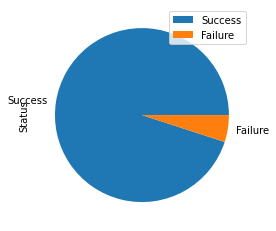

In [17]:
# Now use Matplotlib 
space['Status'].value_counts().plot(kind='pie', legend=True)

<AxesSubplot:>

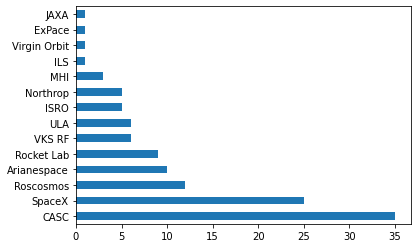

In [23]:
space['Company Name'].value_counts().plot(kind='barh')